In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt


# Lung-Roi 사진 가져오기

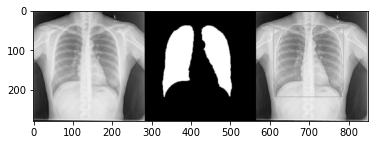

In [2]:
path = "../../../images"
img = cv2.imread(os.path.join(path,'Lung-ROI-segmentation.png'), cv2.IMREAD_GRAYSCALE)

plt.imshow(img, 'gray')

Lung roi의 사진은 (279, 850)의 세가지 사진이 합쳐진 GRAYSCALE의 사진이다.  
850 / 3 = 283.3333 으로, 가로 size = 283의 세 가지 사진으로 나누려고 한다.  
mask 부분의 pixel 값이 0 (black) 임을 이용하여, 값이 있으면 값을 최대치로 올리는 binary threshold를 진행하여 경계값을 찾는다.   

이후 Lung 이미지와 mask 이미지를 bitwise_and 연산을 통해 mask 부분만 잘라낸다.

In [4]:
img.shape

(279, 850)

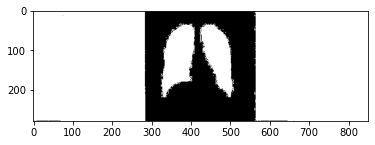

In [5]:
test_img = img.copy()
test_img[test_img>1] = 255
plt.imshow(test_img, cmap='gray')

In [6]:
print(np.sum(test_img[2,:] == 0))
print(np.sum(test_img[2,:] == 255))

281
569


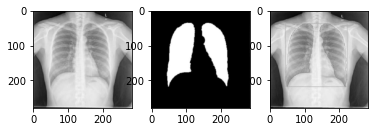

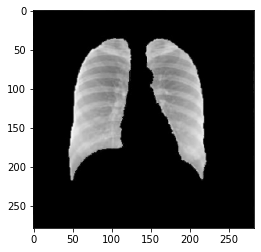

In [7]:
# 이미지를 세가지로 분리
l = np.hsplit(img,(283,566))

plt.subplot(1,3,1)
plt.imshow(l[0], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(l[1], cmap='gray')
plt.subplot(1,3,3)
plt.imshow(l[2], cmap='gray')

result = cv2.bitwise_and(l[0], l[1])
plt.figure()
# Lung 이미지와 mask 이미지 bitwise_and 연산 진행
plt.imshow(result, cmap='gray')

In [8]:
# 분리된 이미지들의 shape
l[0].shape, l[1].shape, l[2].shape

((279, 283), (279, 283), (279, 284))

In [9]:
cv2.imwrite('image/Lung.jpg',l[0])
cv2.imwrite('image/Lung_mask.jpg',l[1])
cv2.imwrite('image/Lung_masked.jpg', result)

True